- Expliquer pourquoi resampler pour l'EDA.
- Expliquer rapidement pourquoi resampler pour le ML.
- Expliquer pour EDA seulement sur training set.
- Expliquer pourquoi scale data.
- Expliquer les algorithmes de resampling.
- Expliquer pourquoi regarder matrice de corrélation.
- Expliquer pourquoi faire une ACP.
- Expliquer résultat ACP.
- Expliquer résultat Factor Map (corrélation entre variable).
- Expliquer lien ACP - factor map.
- Expliquer boxplot negative, boxplot positive.
- Expliquer pourquoi on supprime des outliers.
- Expliquer comment nous on va supprmier certains outliers. Pourquoi on remove seulement des outliers fraudeur?
    - Peut être pour mieux trouver les fraudeurs.
    - http://signalsurgeon.com/how-to-use-statistics-to-identify-outliers-in-data/
- Envisager d'autre techniques pour remove outliers.

- ACP plus tard? voir kaggle notebook.
- ANOVA or kendall for features selection : https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

- tester models avec best features selections (anova)

<b>Plan:</b>
- Introduction:
    - Contexte
    - my goals. (handle imbalanced dataset, confronter plusieurs modèles ML avec des modèle DL pytorch).
- I - Distribution des données
    - a - distribution de la variable Class.
    - b - distribution des variables Time et Amount.
    
- II - Handling imbalanced data.

- III - features selection.
    - Correlation matrix.
    - Kbest with Mutual information.


- IV - Anomaly detection.
    - Box plot
    - IQR.
    - D'autres?
    
- V - Visualization.
    - PCA.
    - Factor map.

<h1>Introduction</h1>

Au XXIe siècle, la plus part des gens utilise une carte de crédit pour faire des paiements. Ces transactions représentent des milliers de millards. Parmis toutes ces transactions certaines sont frauduleuses. Ces transactions frauduleuses atteignent des montants astronomiques de l'ordre du milliard. Il est important que les sociétés de cartes de crédit soient capables de reconnaître les transactions frauduleuses par carte de crédit afin que les clients ne soient pas facturés pour des articles qu'ils n'ont pas achetés. Nous avons ici un jeu de données Kaggle sur lequel nous allons travaillé afin de prédire les cas de fraudes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("tab10")
import numpy as np

In [2]:
df =  pd.read_csv('/Users/lucas/Desktop/DS_project/credit_fraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scalAmount,scalTime
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727,2.913952e-17,-3.065637e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


<br>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

In [4]:
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a aucune valeur nulle, c'est une bonne chose.

<h1>I - Distribution des données</h1>

<h3> a - Target Class: Imbalanced data set</h3>

La distribution des classes est tès importante lorsqu'on fait une classification.

- Les fraudes représentent 0.2% du jeu de données.
- Les non fraudes représentent donc 99.8% deu jeu de données.

Les fraudeurs sont sous représentés, nous sommes en présence de ce que l'on appelle un Imbalanced dataset. Si nous ne prenons pas en compte ce cas particulier, nos modèles risque d'ignorer la classe minoritaire. On pourrait alors avoir une bonne précision générale, mais une mauvaise précision de classification au sein des classes.

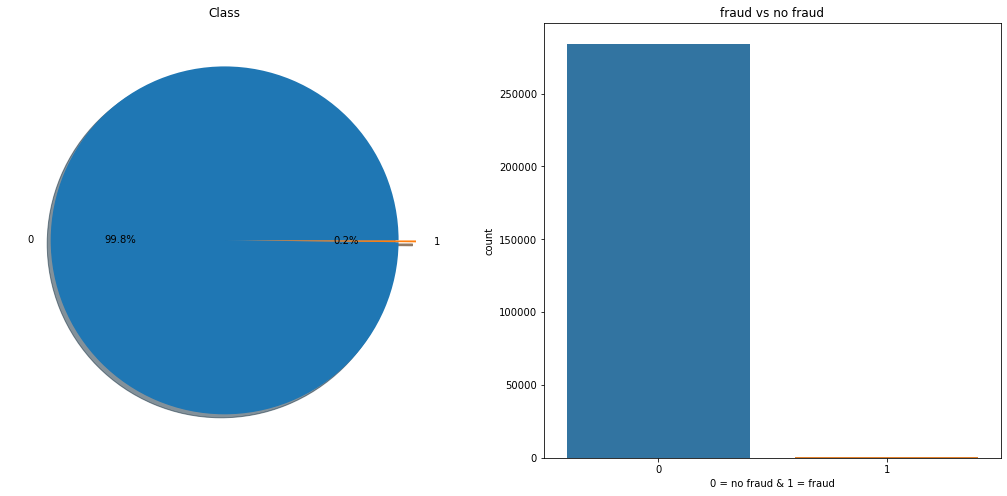

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df['Class'].value_counts().plot.pie(explode=(0,0.1),autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Class')
ax[0].set_ylabel('')

sns.countplot(x='Class',data=df,ax=ax[1])
ax[1].set_title('fraud vs no fraud')
ax[1].set_xlabel('0 = no fraud & 1 = fraud')
plt.show()



<h3> b - Amount and Time</h3>

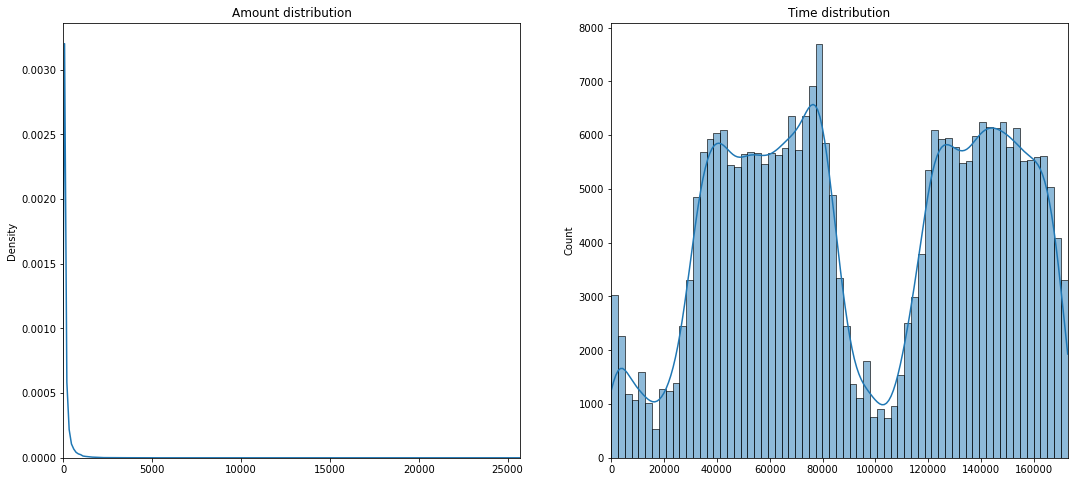

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

amount = df['Amount'].values
time = df['Time'].values

sns.kdeplot(x=amount, ax=ax[0])
ax[0].set_xlim([min(amount), max(amount)])
ax[0].set_title('Amount distribution')


sns.histplot(time, ax=ax[1], kde=True)
ax[1].set_xlim([min(time),max(time)])
ax[1].set_title('Time distribution')


plt.show()

<b> Amount:</b>
 - Most of Amount are less than 5 000 $
 - We need to go further in Amount to better understand it.
    
<b> Time: </b>
- We see 3 range of Time. (0 - 18 000, 18 000 - 100 000, 100 000 - 170 000)

Maybe Amount and Time is skewed, so we will scale those columns.

<br>

- Preparing Data (Amount - Time).
<br>
 To normalize the range of independent variables or features of data will help us to better understand data but it could also help ML algorithms to perform well.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

df['scalAmount'] = scaler.fit_transform(np.array(df['Amount']).reshape(-1,1))
df['scalTime'] = scaler.fit_transform(np.array(df['Time']).reshape(-1,1))

df = df.drop(['Time', 'Amount'], axis = 1)

df[['scalTime', 'scalAmount']].head()

,scalTime,scalAmount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403


<br> 

- <b>Splitting data</b>


Avant de rentrer dans le coeur de l'EDA. nous allons séparer notre data set en train set et test set.

Le test set n'entrera pas en compte dans l'EDA pour ne pas biaiser notre analyse.

In [8]:
from sklearn.model_selection import train_test_split
df_origin_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

<br>
<h1> II - Handling Imbalanced Data.</h1>

- Le défi de travailler avec des ensembles de données déséquilibrés (Imbalanced) est que la plupart des techniques de ML ignoreront la (ou les) classe minoriaire, et auront à leur tour des performances médiocres sur la (ou les) classe minoritaire, bien que ce soit généralement la performance sur la classe minoritaire qui soit la plus importante.

- Lors de l'EDA également, la classe minoritaire aura moins d'importance, nous allons donc réequilibrer les données afin d'avoir autant de cas de fraude que de non fraude.

- Lors du model building nous utiliserons une technique plus avancée qui permet de mieux réequilibrer les données sans perdre trop d'information. Pour la partie de l'EDA nous nous contenterons d'extraire un sous ensemble des cas de non fraude pou qu'il soit de la même taille que l'ensemble des cas de fraudes.



<br>
<h4>A - Simple réequilibrage.</h4>

In [9]:

df_train = df_origin_train.sample(frac=1)


fraud = df_train.loc[df_train['Class'] == 1]
non_fraud = df_train.loc[df_train['Class'] == 0][:394]

undersampled_df = pd.concat([fraud, non_fraud])

undersampled_data = undersampled_df.sample(frac=1, random_state=42)


print("After undersampling '1': {}".format(sum(undersampled_df['Class'] == 1))) 
print("After undersampling '0': {}".format(sum(undersampled_df['Class'] == 0))) 


undersampled_data.head()

After undersampling '1': 394
After undersampling '0': 394


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scalAmount,scalTime
196939,-1.092041,0.339493,-1.001952,-3.158126,1.021427,-0.660715,1.422697,0.041987,-2.291187,-0.727736,...,0.207933,-0.550717,0.131238,1.532327,1.098762,-0.269647,-0.094393,0,0.039103,0.778199
59539,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,-2.495619,...,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,1,-0.274347,-0.967187
203328,-0.967767,2.098019,-5.222929,6.514573,-4.187674,2.114178,0.948701,-2.448427,-3.203666,-3.074034,...,0.796739,1.314312,-0.352887,-1.770706,0.098133,0.956769,0.162777,1,3.346240,0.841372
124036,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,...,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,1,0.162524,-0.371880
57470,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,-3.505790,...,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,1,-0.350191,-0.987424


<br>
<h1> III - Features selection.</h1>

<h3>A - Correlation matrix.</h3>

Ce qui nous intéresse cest surtout les corrélations avec la variable Class. En effet, notre but est de prédire la variable Class, donc nous devons nous intéresser aux variables qui ont une forte corrélation avec notre Target.

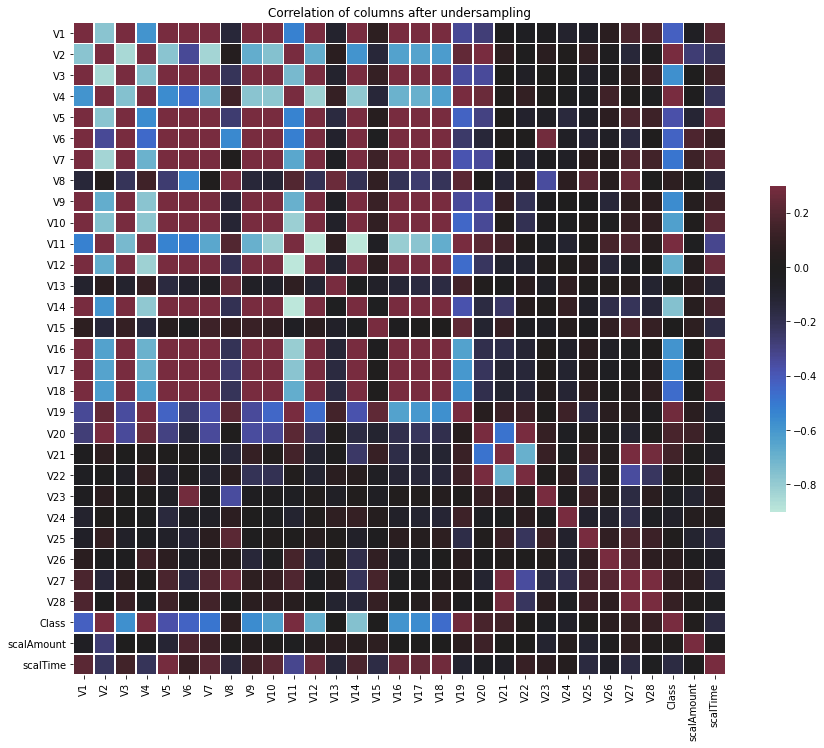

In [10]:
f, ax = plt.subplots(1, 1, figsize=(16,12))

sns.heatmap(undersampled_data.corr(),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_title("Correlation of columns after undersampling")
plt.show()


- <b>best positive correlation</b>: V2, V4, V11, V19

- <b> best negative correlation</b>: V1, V3, V5, V6, V7, V9, V10, V12, V14, V16, V17, V18 

In [11]:
df_corr = undersampled_data[['V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V4', 'V11', 'V19', 'Class' ]]

<br>
<h3> B - Kbest with Mutual information.</h3>

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = fs.fit_transform(df_corr.drop(columns=['Class']).to_numpy(), df_corr.Class.to_numpy())
print(X_selected.shape)


(788, 10)


In [38]:
columns = df_corr.drop(columns=['Class'])
mask = fs.get_support()
columns_selected =  columns.columns[mask]
print(fs.scores_[mask])
columns_selected

[0.35019134 0.31330149 0.42509862 0.39856646 0.46429145 0.32748949
 0.43094953 0.27788173 0.36993827 0.36391178]


Index(['V3', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V4', 'V11'], dtype='object')

- On va donc garder V3, V7, V10, V12, V14, V16, V17, V2, V4, V11

<h1> IV - Anomaly detection </h1>

sources: https://towardsdatascience.com/boxplot-for-anomaly-detection-9eac783382fd

In [39]:
pos = ['V2', 'V4', 'V11']
neg = [ 'V3', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17']

<br>
<h3> A - Boxplot</h3>

- Statistically speaking, a boxplot provides several pieces of information, two important ones are the quartiles, represented by both ends of the box. The distance between these two quartiles is called the Interquartile Range (IQR).

- Positive

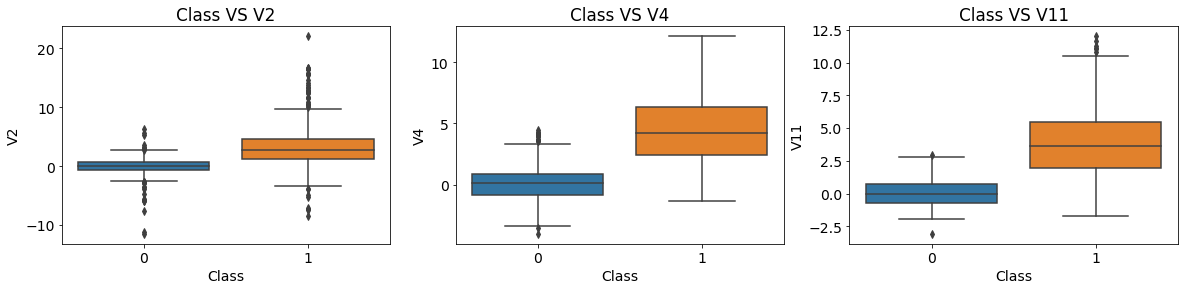

In [40]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))
for i in range(0, len(pos)):
    sns.boxplot(x="Class", y=pos[i], data=df_corr,palette=colors, ax=axes[i])
    axes[i].set_title('Class VS ' + pos[i])

- Negative

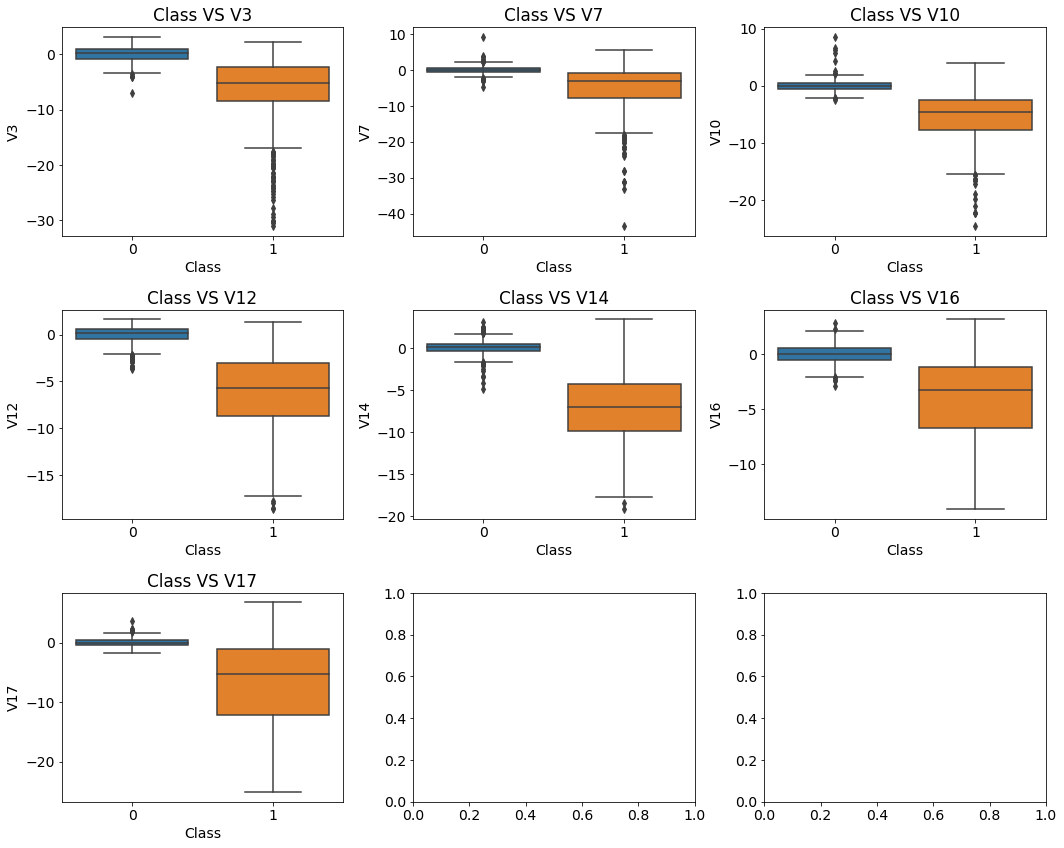

In [41]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
for i in range(0, 3):
    sns.boxplot(x="Class", y=neg[i], data=df_corr,palette=colors, ax=axes[0][i])
    axes[0][i].set_title('Class VS ' + neg[i])
for i in range(3, 6):
    sns.boxplot(x="Class", y=neg[i], data=df_corr,palette=colors, ax=axes[1][i-3])
    axes[1][i-3].set_title('Class VS ' + neg[i])
for i in range(6, len(neg)):
    sns.boxplot(x="Class", y=neg[i], data=df_corr,palette=colors, ax=axes[2][i-6])
    axes[2][i-6].set_title('Class VS ' + neg[i])

f.tight_layout()
plt.show()

<br>

- <h3> B - IQR score : Removing outlier</h3>

- In the boxplots above, the length of the boxes is IQR, and the minimum and maximum values are represented by the whiskers. The whiskers are generally extended into threshold*IQR distance on either side of the boxes. Therefore, all data points outside these threshold*IQR values are flagged as outliers.

In [42]:
def remove_outlier(df, column, th):
    
    outliers = []
    fraud = df[column].loc[df['Class'] == 1].values
   
    q1, q3 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    
    IQR = q3 - q1
    
    IQR_th = IQR * th
    lower, upper = q1 - IQR_th, q3 + IQR_th
    
    print('Lower: {}'.format(lower))
    print('Upper: {}'.format(upper))

    outliers = [x for x in fraud if (x < lower) or (x > upper)]
    print('Feature Outliers for Fraud Cases: {}'.format(len(outliers)))
    df = df.drop(df[(df[column] > upper) | (df[column] < lower)].index)

    print('Number of Instances after outliers removal: {}'.format(len(df)))
    print('----' * 30)
    
    return df,outliers

In [50]:
df_woutlier = df_corr[neg+pos+['Class']]
for i in (neg+pos):
    (df_woutlier,_) = remove_outlier(df_woutlier, i, 2)


Lower: -20.71294378452484
Upper: 10.085004639816018
Feature Outliers for Fraud Cases: 25
Number of Instances after outliers removal: 763
------------------------------------------------------------------------------------------------------------------------
Lower: -15.70919361730123
Upper: 8.974959321549669
Feature Outliers for Fraud Cases: 15
Number of Instances after outliers removal: 747
------------------------------------------------------------------------------------------------------------------------
Lower: -15.006970663264614
Upper: 6.2166010982767625
Feature Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 740
------------------------------------------------------------------------------------------------------------------------
Lower: -19.171230072944212
Upper: 8.196235513928645
Feature Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 740
-------------------------------------------------------------------------------------------

<br>
<h1>V - visualization</h1>

<h3>A - PCA</h3>

L' ACP permet de mettre en évidence...
- A key insight from  The figure below shows that for the most data the class 0 will be easy to separate from the other class 1.
- Cependant, quelques membres de la classe 0 se confondent parmis le groupe formé par la classe 1.

[0.83851552 0.07163137 0.02427848]


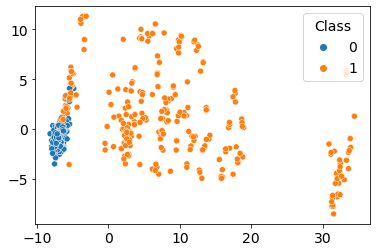

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
coords = pca.fit_transform(df_woutlier.drop(columns=['Class']).to_numpy())
print(pca.explained_variance_ratio_)
sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=df_woutlier.Class)
plt.show()

<h3>B - Factor map</h3>

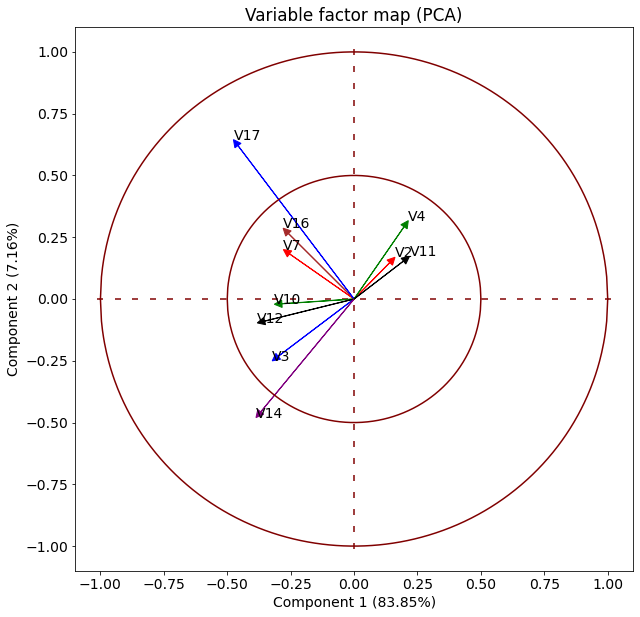

In [54]:
from variable_factor_map import pca_map 
pca_map(df_woutlier.drop(columns=['Class']), figsize=(10,10), print_values=False)
plt.show()

In [45]:

for i in (neg+pos):
    (df_origin_train,_) = remove_outlier(df_origin_train, i, 1.75)
    
features = neg+pos+['Class']

df_origin_train[features].to_csv('/Users/lucas/Desktop/DS_project/credit_fraud/train_set.csv',index=False)
df_test[features].to_csv('/Users/lucas/Desktop/DS_project/credit_fraud/test_set.csv',index=False)

Lower: -13.0657454398301
Upper: 5.662950407912756
Feature Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 218885
------------------------------------------------------------------------------------------------------------------------
Lower: -9.67754656797294
Upper: 5.338376872340345
Feature Outliers for Fraud Cases: 2
Number of Instances after outliers removal: 218825
------------------------------------------------------------------------------------------------------------------------
Lower: -11.76049067369901
Upper: 4.2911143802125995
Feature Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 218825
------------------------------------------------------------------------------------------------------------------------
Lower: -14.910113222657792
Upper: 5.3576590111282085
Feature Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 218825
------------------------------------------------------------------------------------